In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

### Data Processor

In [65]:
# Replace 'url' with the URL of your data file
url = 'https://raw.githubusercontent.com/saibharath005/crsscoreanalyzer/main/CRS_Data.csv'
# Read the file directly from URL
df = pd.read_csv(url)

df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df = df.rename(columns={"Round_Type": "category", "Score": "value"})

### Data Transformer

In [66]:
# Group by 'year', 'month', and 'category' and calculate min and max values
result = df.groupby(['year', 'month', 'category']).agg({'value': ['min', 'max']})

# Reset index to make the grouped columns regular columns
result = result.reset_index()

print(result)


     year month                              category value     
                                                        min  max
0    2015     1                  No Program Specified   886  886
1    2015     2             Canadian Experience Class   808  808
2    2015     2                  No Program Specified   735  818
3    2015     3                  No Program Specified   453  481
4    2015     4                  No Program Specified   453  469
..    ...   ...                                   ...   ...  ...
151  2023    12  French language proficiency (2023-1)   470  470
152  2023    12                               General   542  561
153  2023    12             STEM occupations (2023-1)   481  481
154  2023    12            Trade occupations (2023-1)   425  425
155  2023    12        Transport occupations (2023-1)   435  435

[156 rows x 5 columns]


### Data Visualizer Code Generator

In [67]:
# Create dropdown widgets for selecting the year, month, and category
years = result['year'].unique().tolist()
# months = result['Month'].unique().tolist()
categories = result['category'].unique().tolist()

dropdown_year = widgets.Dropdown(options=years, description='Select Year:')
# dropdown_month = widgets.Dropdown(options=months, description='Select Month:')
dropdown_category = widgets.SelectMultiple(options=categories, description='Select Category:')

In [68]:
# Function to update the plot based on the selected year and category
def update_plot_year_category(year, category):
    filtered_data = result[(result['year'] == year) & (result['category'].isin(category))]
    
    
    # Plotting
    fig, ax = plt.subplots(figsize=(12, 8))
    for cat in filtered_data['category'].unique():
        subset = filtered_data[filtered_data['category'] == cat]
        x_vals = subset.apply(lambda row: pd.Timestamp(f"{int(row['year'])}-{int(row['month']):02d}-01"), axis=1)
        ax.plot(x_vals, subset['value']['min'], marker='o', label=f'{cat} (min)')
        ax.plot(x_vals, subset['value']['max'], marker='o', label=f'{cat} (max)')
    
    # Annotate min values
    for i, val in enumerate(subset['value']['min']):
        ax.text(x_vals.iloc[i], val, f'{val}', ha='right', va='bottom')

    # Annotate max values
    for i, val in enumerate(subset['value']['max']):
        ax.text(x_vals.iloc[i], val, f'{val}', ha='left', va='top')

    # Customize labels and legend
    ax.set_xlabel('Date')
    ax.set_ylabel('Value')
    ax.set_title(f'Minimum and Maximum Values by Category for {year}')
    ax.legend()
    plt.tight_layout()
    plt.show()

# Display the dropdowns and plot
# display(dropdown_year)
# display(dropdown_category)
# widgets.interactive(update_plot_year_category, year=dropdown_year, category=dropdown_category)

In [69]:
dropdown_start_year = widgets.Dropdown(options=years, description='Select Start Year:')
dropdown_end_year = widgets.Dropdown(options=years, description='Select End Year:')

# Function to update the plot based on the selected category
def update_plot(category,start_year,end_year):
    print(start_year)
    print(end_year)
    
    filtered_data = result[result['category'].isin(category) & ((result['year'] >= start_year) & (result['year'] <= end_year))]
    print(filtered_data['year'].unique())
    
    # Plotting
    fig, ax = plt.subplots(figsize=(20, 6))
    for year in filtered_data['year'].unique():
        subset = filtered_data[filtered_data['year'] == year]
        x_vals = subset.apply(lambda row: pd.Timestamp(f"{int(row['year'])}-{int(row['month']):02d}-01"), axis=1)
        ax.plot(x_vals, subset['value']['min'], marker='o', label=f'{year} (min)')
        ax.plot(x_vals, subset['value']['max'], marker='o', label=f'{year} (max)')
        
        # Annotate min values
        for i, val in enumerate(subset['value']['min']):
            ax.text(x_vals.iloc[i], val, f'{val}', ha='right', va='bottom')
            
        # Annotate max values
        for i, val in enumerate(subset['value']['max']):
            ax.text(x_vals.iloc[i], val, f'{val}', ha='left', va='top')

    # Customize labels and legend
    ax.set_xlabel('Date')
    ax.set_ylabel('value')
    ax.set_title(f'Minimum and Maximum Values for Category {category}')
    ax.legend()
    plt.tight_layout()
    plt.show()

# Display the dropdown and plot
# display(dropdown_category)
# widgets.interactive(update_plot, category=dropdown_category,start_year=dropdown_start_year ,end_year=dropdown_end_year)


### Year X Round Type

interactive(children=(Dropdown(description='Select Year:', options=(2015, 2016, 2017, 2018, 2019, 2020, 2021, …

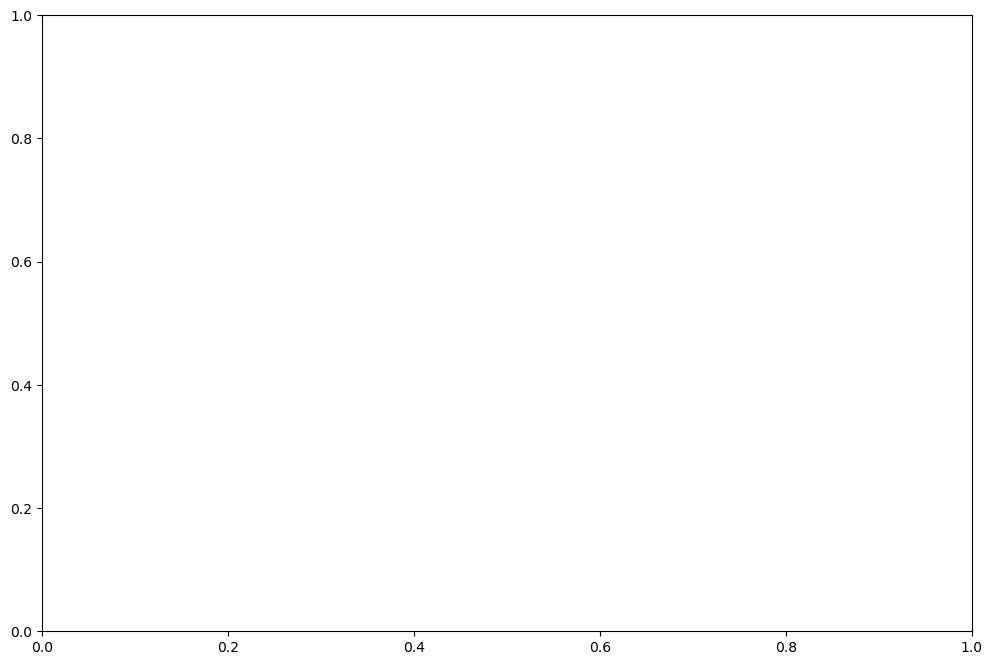

In [70]:
widgets.interactive(update_plot_year_category, year=dropdown_year, category=dropdown_category)

### Years X Round Type

In [71]:
widgets.interactive(update_plot, category=dropdown_category,start_year=dropdown_start_year ,end_year=dropdown_end_year)

interactive(children=(SelectMultiple(description='Select Category:', options=('No Program Specified', 'Canadia…